In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pickle
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
dataset, info = tfds.load(name="stanford_dogs", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteJLEGRL/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteJLEGRL/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [4]:
IMG_LEN = 299
IMG_SHAPE = (IMG_LEN, IMG_LEN, 3)
N_BREEDS = 60

training_data = dataset['train']
test_data = dataset['test']

**Extract pictures and labels and save them as pickle objects**

In [5]:
retrieved_batches = 1000
distribution_of_labels = []
train_x = []
train_y = []

In [15]:
i = 0

for x in training_data:
  if i == retrieved_batches:
    break
  if (x['label'].numpy() > 59) :
    continue
    
  img = x['image'] / 255
  img = tf.image.resize(img, (IMG_LEN, IMG_LEN), method='nearest')
  train_x.append(np.array(img))
  distribution_of_labels.append(x['label'].numpy())
  label = tf.one_hot(np.array(x['label']),N_BREEDS)
  train_y.append(label)
  i += 1

AttributeError: ignored

In [13]:

plt.hist(distribution_of_labels, bins=60);

TypeError: ignored

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(60,), dtype=float32)


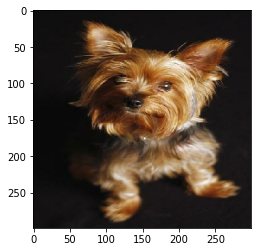

In [8]:
plt.imshow(train_x[0]);
print(train_y[0])

In [9]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [10]:
save_np= open(f'drive/MyDrive/1000_pics.pickle','wb')
pickle.dump(train_x, save_np)
save_np.close()

In [11]:
save_np= open(f'drive/MyDrive/1000_labels.pickle','wb')
pickle.dump(train_y, save_np)
save_np.close()